# Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv('gene_expression.csv')
df.head()

Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1

# Display summary of dataset

In [2]:
df.describe()

Gene One     Gene Two  Cancer Present
count  3000.000000  3000.000000     3000.000000
mean      5.600133     5.410467        0.500000
std       1.828388     1.729081        0.500083
min       1.000000     1.000000        0.000000
25%       4.300000     4.000000        0.000000
50%       5.600000     5.400000        0.500000
75%       6.900000     6.700000        1.000000
max      10.000000    10.000000        1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


# Let's Decision Tree classification model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [8]:
x = df[['Gene One', 'Gene Two']] # Independent variables
y = df[['Cancer Present']] # Dependent variables

In [9]:
x

Gene One  Gene Two
0          4.3       3.9
1          2.5       6.3
2          5.7       3.9
3          6.1       6.2
4          7.4       3.4
...        ...       ...
2995       5.0       6.5
2996       3.4       6.6
2997       2.7       6.5
2998       3.3       5.6
2999       4.6       8.2

[3000 rows x 2 columns]

In [17]:
y

Cancer Present
0                  1
1                  0
2                  1
3                  0
4                  1
...              ...
2995               1
2996               0
2997               0
2998               0
2999               0

[3000 rows x 1 columns]

In [18]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3) # Training size = 70%

In [19]:
classifier = DecisionTreeClassifier(max_leaf_nodes=25, criterion='entropy')
classifier.fit(xTrain, yTrain)
classifier

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=25)

In [21]:
yPred = classifier.predict(xTest)

In [22]:
cm = confusion_matrix(yTest, yPred)
cm

array([[432,  28],
       [ 38, 402]])

In [25]:
acc = accuracy_score(yTest, yPred)
print("Accuracy Score: " + str(acc*100) + "%") 

Accuracy Score: 92.66666666666666%


# Data Visualization

In [27]:
from sklearn.tree import export_graphviz 

export_graphviz(classifier, 
                filled=True, rounded=True, 
                special_characters=True, 
                feature_names=['Gene One', 'Gene Two'],
                out_file = open('gene.dot', 'w')
)

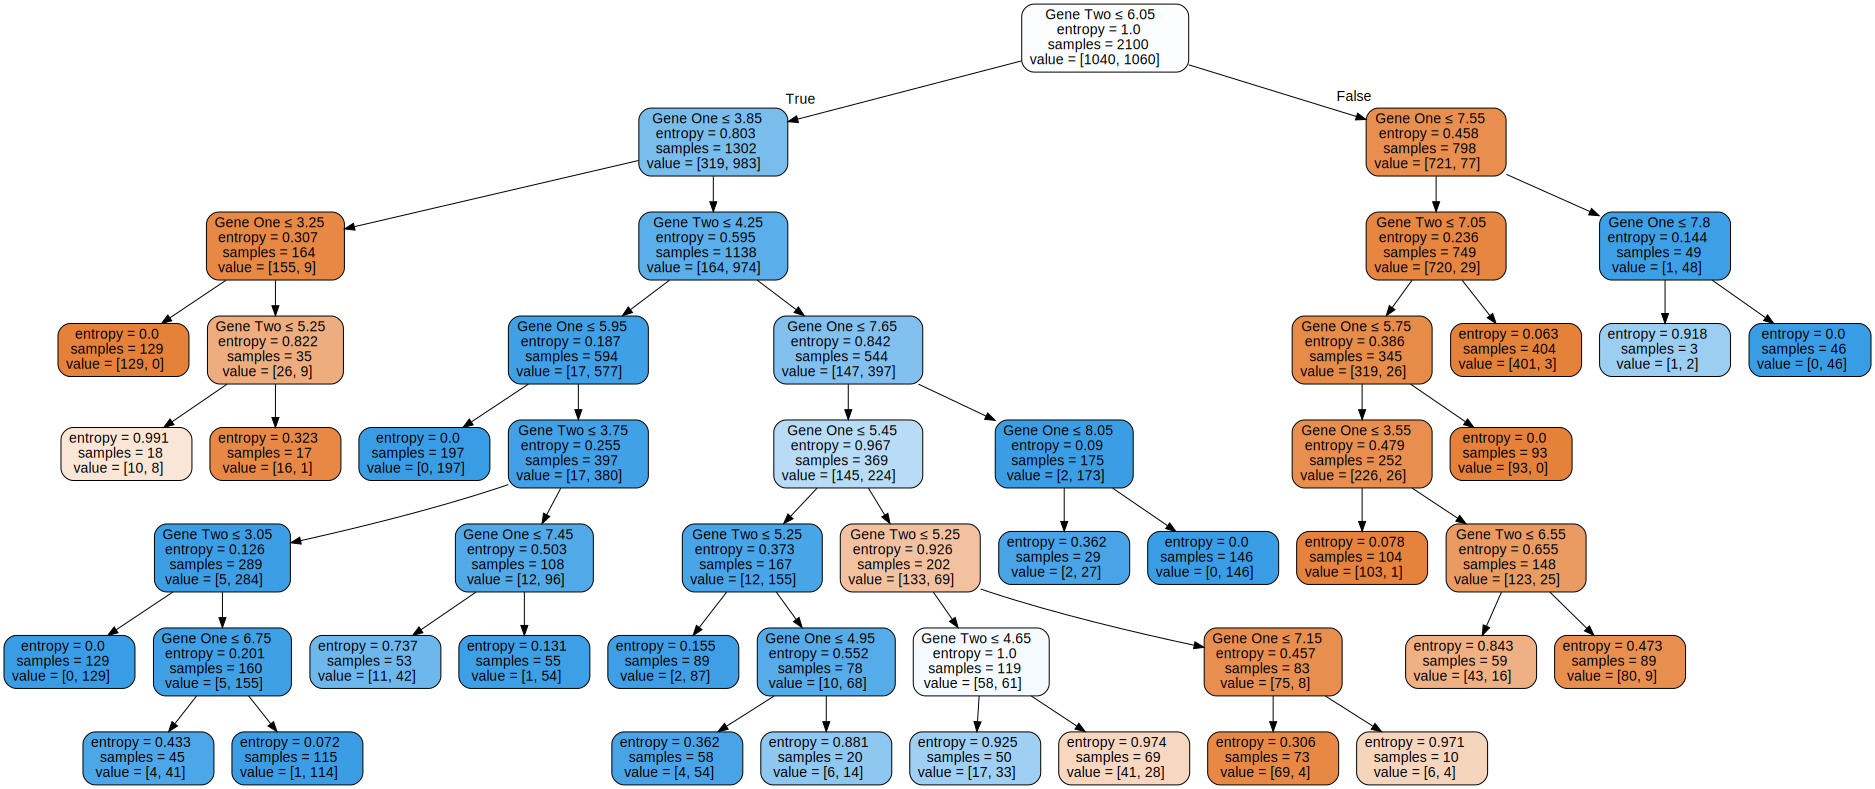

In [28]:
import graphviz
from graphviz import Source

s = Source.from_file('gene.dot')
s.render()
s

In [31]:
classifier.feature_importances_

array([0.47087803, 0.52912197])